In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import zipfile
import os



zip_file_path = '/content/drive/MyDrive/wca/WACV 2024/sickle_dataset.zip'  # Replace with your actual file path
extract_path = '/content' # Replace with your desired extraction path


# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Successfully extracted files to '{extract_path}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: Zip file not found at '{zip_file_path}'")

Successfully extracted files to '/content'


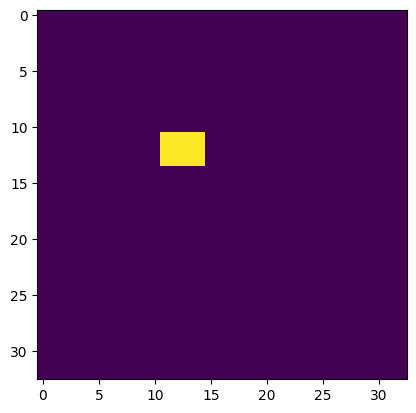

In [ ]:
# prompt: show tif as an image

import matplotlib.pyplot as plt
import tifffile as tiff

# Assuming you have a tif file in the extracted directory, e.g., 'image.tif'
image_path = '/content/masks/10m/581.tif'  # Replace with your tif file path

try:
  img = tiff.imread(image_path)
  plt.imshow(img[1])
  plt.show()
except FileNotFoundError:
  print(f"Error: Image file not found at '{image_path}'")
# except Exception as e:
#   print(f"An error occurred while displaying the image: {e}")

In [ ]:
import numpy as np

# Replace 'your_file.npz' with the actual path to your .npz file
file_path = '/content/images/S2/npy/1003/20180918T045649_20180918T045649_T44PLS.npz'

try:
    with np.load(file_path) as data:
        print("Contents of the .npz file:")
        for key in data:
            print(f"  - {key}: {data[key].shape} (dtype: {data[key].dtype})")
            # Optionally print more details, e.g.:
            # print(f"    First few elements: {data[key][:5]}")
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of the .npz file:
  - B6: (17, 17) (dtype: float32)
  - AOT: (33, 33) (dtype: float32)
  - B1: (6, 6) (dtype: float32)
  - B12: (17, 17) (dtype: float32)
  - B5: (17, 17) (dtype: float32)
  - B3: (33, 33) (dtype: float32)
  - B2: (33, 33) (dtype: float32)
  - SCL: (17, 17) (dtype: float32)
  - B9: (6, 6) (dtype: float32)
  - B8A: (17, 17) (dtype: float32)
  - MSK_CLDPRB: (17, 17) (dtype: float32)
  - WVP: (33, 33) (dtype: float32)
  - B4: (33, 33) (dtype: float32)
  - B7: (17, 17) (dtype: float32)
  - B8: (33, 33) (dtype: float32)
  - B11: (17, 17) (dtype: float32)


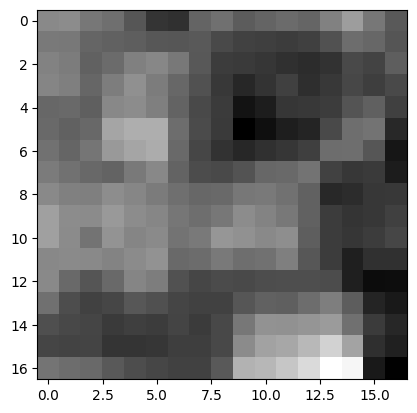

In [ ]:
# prompt: plot npz as an imagee

import matplotlib.pyplot as plt
import numpy as np

# Replace 'your_file.npz' with the actual path to your .npz file
file_path = '/content/images/S2/npy/1007/20200126T050051_20200126T051417_T44PLS.npz'

try:
    with np.load(file_path) as data:
        # Assuming the .npz file contains an array named 'image' or similar
        # Adapt the key 'image' if your array has a different name
        if 'B3' in data:
            image_data = data['B3']
            # Check if the data is 2D or 3D and handle appropriately
            if image_data.ndim == 2:
                plt.imshow(image_data, cmap='gray')  # Use 'gray' for grayscale images
                plt.show()
            elif image_data.ndim == 3:
                # Assuming the 3rd dimension represents color channels (e.g., RGB)
                plt.imshow(image_data)
                plt.show()
            else:
              print("Image data has an unsupported number of dimensions.")
        else:
            print("The .npz file does not contain an array named 'image'.")
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
# prompt: find rows with "Paddy" as "Crop" and YIELD greater than 1 in the given csv

import pandas as pd

# Assuming your CSV file is named 'your_file.csv'
file_path = '/content/sickle_dataset_tabular.csv'  # Replace with the actual path to your CSV file

try:
    df = pd.read_csv(file_path)

    # Filter the DataFrame
    # filtered_df = df[(df['CROP'] == 'Paddy')]
    filtered_df = df[(df['CROP'] == 'Paddy') & (df['YIELD'] != 0)]

    print(len(filtered_df))

except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
except KeyError as e:
    print(f"Error: Column not found in the CSV file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

filtered_df

319


,UNIQUE_ID,PLOT_ID,RIVER_PART,STANDARD_SEASON,YEAR,AREA,CROP,VARIETY,PADDY_BIN,SOWING_DATE,TRANSPLANTING_DATE,HARVESTING_DATE,SOWING_DAY,TRANSPLANTING_DAY,HARVESTING_DAY,YIELD,SPLIT
2019,2060,300.0,NaN,oct-mar,2019.0,0.75,Paddy,CR 1009,1.0,10/2/2019,11/7/2019,3/12/2020,2.0,38.0,164.0,1760.0,train
2020,2061,300.0,NaN,oct-mar,2020.0,0.75,Paddy,CR 1009,1.0,10/4/2020,11/12/2020,3/20/2021,4.0,43.0,171.0,1680.0,train
2021,2062,301.0,NaN,oct-mar,2019.0,1.00,Paddy,CR 1009,1.0,10/3/2019,11/3/2019,3/15/2020,3.0,34.0,167.0,960.0,train
2022,2063,301.0,NaN,oct-mar,2020.0,1.00,Paddy,CR 1009,1.0,10/6/2020,11/11/2020,3/21/2021,6.0,42.0,172.0,2160.0,train
2023,2064,302.0,NaN,oct-mar,2019.0,0.50,Paddy,CR 1009,1.0,10/3/2019,11/8/2019,3/15/2020,3.0,39.0,167.0,1720.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2404,446.0,NaN,sep-feb,2020.0,1.00,Paddy,CR 1009,1.0,9/3/2020,10/3/2020,2/15/2021,3.0,33.0,168.0,2560.0,train
2364,2405,447.0,NaN,sep-feb,2019.0,1.00,Paddy,BPT,1.0,9/3/2019,10/3/2019,2/8/2020,3.0,33.0,161.0,2480.0,train
2365,2406,447.0,NaN,sep-feb,2020.0,1.00,Paddy,CR 1009,1.0,9/3/2020,10/3/2020,2/15/2021,3.0,33.0,168.0,2560.0,train
2366,2407,448.0,NaN,sep-feb,2019.0,1.00,Paddy,BPT,1.0,9/3/2019,10/3/2019,2/8/2020,3.0,33.0,161.0,2480.0,train


In [ ]:
yield_zero_count = len(filtered_df[filtered_df['YIELD'] == 0])

print(f"Number of rows with YIELD equal to 0: {yield_zero_count}")

Number of rows with YIELD equal to 0: 0


In [ ]:
# prompt: print unique values of CROP column in df

print(df['CROP'].unique())

['Coconut' 'Banana' nan 'Paddy' 'Tomato' 'Brinjal' 'Bhendi' 'Cotton'
 'Tamarind tree' 'Banyan' 'Mixed plantation' 'Sesame' 'Palm tree'
 'Green gram' 'Sugarcane' 'Black gram' 'Betelwine' 'Teak' 'Eucalyptus'
 'Blackgram' 'Mixed' 'Groundnut']


In [ ]:
wheat_df = df[(df['CROP'] == 'wheat')]
wheat_df

,UNIQUE_ID,PLOT_ID,RIVER_PART,STANDARD_SEASON,YEAR,AREA,CROP,VARIETY,PADDY_BIN,SOWING_DATE,TRANSPLANTING_DATE,HARVESTING_DATE,SOWING_DAY,TRANSPLANTING_DAY,HARVESTING_DAY,YIELD,SPLIT


In [ ]:
import os
import numpy as np
import tifffile as tiff
image_dir = '/content/images/S2/npy'
mask_dir = '/content/masks/10m'

def load_data(unique_id, image_dir, mask_dir):
    # Locate the folder corresponding to the unique_id
    image_folder = os.path.join(image_dir, str(unique_id))
    if not os.path.exists(image_folder):
        print(f"Error: Folder for {unique_id} not found in {image_dir}")
        return None, None

    # Find all `.npz` files in the folder
    image_files = sorted(
        [os.path.join(image_folder, file) for file in os.listdir(image_folder)
         if file.endswith(".npz")]
    )
    if not image_files:
        print(f"Error: No image files found for {unique_id} in {image_folder}")
        return None, None

    # Load images into a list
    images = []
    try:
        for file in image_files:
            with np.load(file) as data:
                # Assuming the bands are named consistently across files
                bands = [data['B2'], data['B3'], data['B4'], data['B8']]  # Adjust keys as necessary
                bands = [np.resize(band, (33, 33)) for band in bands]
                image = np.stack(bands, axis=-1)  # Combine bands into a single array
                images.append(image)
                del image
        del image_files
        del data
        del bands

    except Exception as e:
        print(f"Error loading images in {image_folder}: {e}")
        return None, None

    # Load the mask
    mask_name = f"{unique_id}.tif"
    mask_path = os.path.join(mask_dir, mask_name)
    if not os.path.exists(mask_path):
        print(f"Error: Mask file not found for {unique_id} in {mask_dir}")
        return None, None

    try:
        mask = tiff.imread(mask_path)
        # Preprocess the mask if needed
    except Exception as e:
        print(f"Error loading mask {mask_path}: {e}")
        return None, None

    return images, mask


# Example usage:
image_data = []
mask_data = []
yields = []

for index, row in filtered_df.sort_values(by=['HARVESTING_DATE']).iterrows():
    unique_id = row['UNIQUE_ID']
    date = row['HARVESTING_DATE']
    yield_value = row['YIELD']

    images, mask = load_data(unique_id, image_dir, mask_dir)

    if images is not None and mask is not None:
        image_data.append(images)  # Add list of images for each unique_id
        mask_data.append(mask)    # Add the corresponding mask
        yields.append(yield_value)

# The final `image_data` will be a list of lists.
# To handle varying sizes, pad or truncate images for batch processing during training.

print(f"Total unique_ids processed: {len(image_data)}")


Total unique_ids processed: 319


In [ ]:
# for img in image_data:
#   print(len(img))
print(len(image_data[0]))
print(mask_data[25].shape)
print(len(yields))

72
(6, 33, 33)
319


In [ ]:
def pad_images(image_list, max_images, target_shape=(33, 33, 4)):
    padded_images = []
    for images in image_list:
        # Truncate if more than max_images
        if len(images) > max_images:
            images = images[:max_images]
        # Pad if fewer than max_images
        while len(images) < max_images:
            images.append(np.zeros(target_shape))
        padded_images.append(np.stack(images, axis=0))
    return np.array(padded_images)

# Define maximum images per unique_id (e.g., 10)
max_images = 72
padded_image_data = pad_images(image_data, max_images)

print(f"Padded image data shape: {padded_image_data.shape}")

Padded image data shape: (319, 72, 33, 33, 4)


In [ ]:
del image_data

In [ ]:
import gc

gc.collect()

5250

In [ ]:
import numpy as np
import skimage.transform

def preprocess_data(images, masks):

    preprocessed_images = []
    preprocessed_masks = []

    for img, mask in zip(images, masks):
        # Resize the 0th channel of the mask to (33, 33)
        resized_mask = skimage.transform.resize(
            mask[0], (33, 33), order=0, preserve_range=True
        ).astype(np.int32)  # Preserve the integer labels

        # Normalize image and ensure mask compatibility
        img_normalized = img / 255.0  # Normalize image pixel values (if needed)

        preprocessed_images.append(img_normalized)
        preprocessed_masks.append(resized_mask)

    # Convert to NumPy arrays
    preprocessed_images = np.array(preprocessed_images)
    preprocessed_masks = np.array(preprocessed_masks)

    return preprocessed_images, preprocessed_masks


preprocessed_images, preprocessed_masks = preprocess_data(padded_image_data, mask_data)

print("Images shape:", preprocessed_images.shape)  # Should be (N, 4, 33, 33)
print("Masks shape:", preprocessed_masks.shape)    # Should be (N, 33, 33)


Images shape: (319, 72, 33, 33, 4)
Masks shape: (319, 33, 33)


In [ ]:
del padded_image_data
del mask_data
gc.collect()

0

In [ ]:
import numpy as np

# Example input arrays (replace with your actual data)
# Images shape: (89, 72, 33, 33, 4)
# Masks shape: (89, 33, 33)

def apply_mask_to_dataset(images, masks):

    # Validate dimensions
    assert images.shape[0] == masks.shape[0], "Mismatch in number of sets (89)"
    assert images.shape[2:4] == masks.shape[1:], "Mismatch in spatial dimensions"

    # Expand the mask dimensions for broadcasting
    expanded_masks = masks[:, np.newaxis,:,:, np.newaxis]  # Shape: (89, 1, 33, 33, 1)

    # Broadcast and apply the mask
    masked_images = images * expanded_masks  # Element-wise multiplication
    return masked_images

# Apply the function
masked_images = apply_mask_to_dataset(preprocessed_images, preprocessed_masks)

# Print shapes to verify
print("Original Images shape:", preprocessed_images.shape)
print("Masks shape:", preprocessed_masks.shape)
print("Masked Images shape:", masked_images.shape)


Original Images shape: (319, 72, 33, 33, 4)
Masks shape: (319, 33, 33)
Masked Images shape: (319, 72, 33, 33, 4)


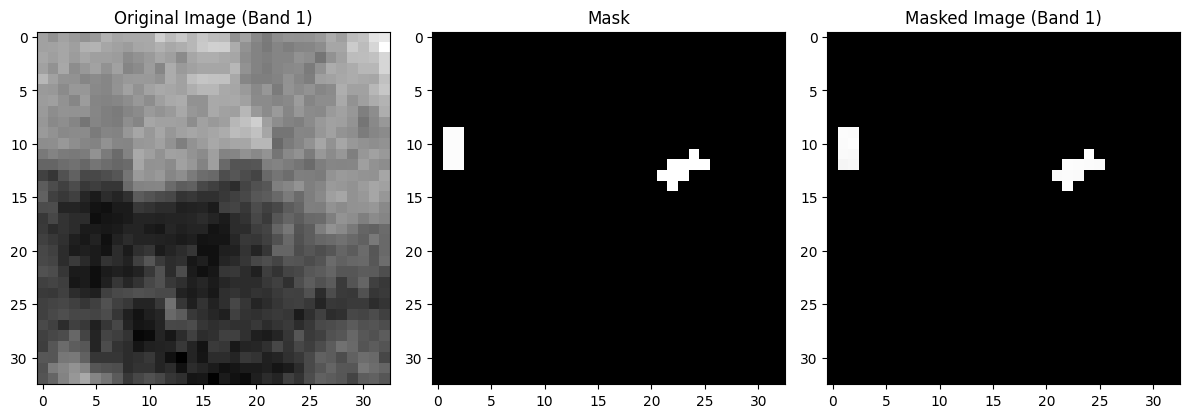

In [ ]:
import matplotlib.pyplot as plt

# Select a sample image and its mask
sample_image = preprocessed_images[1, 1, :, :, :]  # First image in first set
sample_mask = preprocessed_masks[1, :, :]  # First mask in first set
sample_masked_image = masked_images[1, 1, :, :, :]  # Masked result

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image (Band 1)")
plt.imshow(sample_image[:, :, 0], cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(sample_mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Masked Image (Band 1)")
plt.imshow(sample_masked_image[:, :, 0], cmap='gray')

plt.tight_layout()
plt.show()


In [ ]:
del preprocessed_images
del preprocessed_masks

gc.collect()

9589

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_yield_prediction_model():
    # Shared CNN backbone for processing each image
    cnn_backbone = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(33, 33, 4)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu')
    ])

    # Input: 72 images per plot
    plot_input = layers.Input(shape=(72, 33, 33, 4))

    # Process each image using the shared CNN backbone
    processed_images = layers.TimeDistributed(cnn_backbone)(plot_input)  # Shape: (72, 128)

    # Aggregate features across the 72 images
    aggregated_features = layers.GlobalAveragePooling1D()(processed_images)  # Shape: (128)

    # Fully connected layers for yield prediction
    x = layers.Dense(64, activation='relu')(aggregated_features)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(1, activation='linear', name='yield_output')(x)

    # Create the model
    model = models.Model(inputs=plot_input, outputs=output)
    return model

# Create the model
model = create_yield_prediction_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 72, 33, 33, 4)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 72, 128)             │       1,142,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ yield_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,150,561 (4.39 MB)

 Trainable params: 1,150,561 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_yield_prediction_model():
    # Input: 72 images per plot, each of shape (33, 33, 4)
    plot_input = layers.Input(shape=(72, 33, 33, 4), name="plot_input")

    # Shared CNN backbone for processing each image
    img_input = layers.Input(shape=(33, 33, 4), name="image_input")
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
    x = layers.BatchNormalization()(x)  # Added batch normalization
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)  # Added batch normalization
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    cnn_output = layers.Dense(128, activation='relu', name="cnn_output")(x)
    cnn_backbone = models.Model(inputs=img_input, outputs=cnn_output, name="cnn_backbone")

    # Process each image using the shared CNN backbone
    processed_images = layers.TimeDistributed(cnn_backbone)(plot_input)  # Shape: (72, 128)

    # Aggregate features across the 72 images using LSTM
    aggregated_features = layers.LSTM(64, return_sequences=True)(processed_images)  # Shape: (64)
    aggregated_features_1 = layers.LSTM(64, return_sequences=False)(processed_images)

    # Fully connected layers for yield prediction
    x = layers.Dense(64, activation='relu')(aggregated_features_1)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(1, activation='linear', name='yield_output')(x)  # Linear activation for regression

    # Create the model
    model = models.Model(inputs=plot_input, outputs=output, name="yield_prediction_model")
    return model

# Create the model
model = create_yield_prediction_model()

# Compile the model with appropriate loss and metrics for regression
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# Print the model summary
model.summary()


Model: "yield_prediction_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ plot_input (InputLayer)              │ (None, 72, 33, 33, 4)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 72, 128)             │       1,142,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ yield_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,196,257 (4.56 MB)

 Trainable params: 1,196,065 (4.56 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
#test2
import tensorflow as tf
from tensorflow.keras import layers, models

def create_yield_prediction_model_with_lstm():
    # Shared CNN backbone
    cnn_backbone = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(33, 33, 4)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu')
    ])

    # Input: 72 images per plot
    plot_input = layers.Input(shape=(72, 33, 33, 4))

    # Process each image using the shared CNN backbone
    processed_images = layers.TimeDistributed(cnn_backbone)(plot_input)  # Shape: (72, 128)


    # Fully connected layers for yield prediction
    x = layers.Dense(64, activation='relu')(processed_images)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(1, activation='linear', name='yield_output')(x)

    # Create the model
    model = models.Model(inputs=plot_input, outputs=output)
    return model

# Create the model
model = create_yield_prediction_model_with_lstm()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 72, 33, 33, 4)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 72, 128)             │       1,142,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 72, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ yield_output (Dense)                 │ (None, 72, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,150,945 (4.39 MB)

 Trainable params: 1,150,753 (4.39 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
yields = np.array(yields)
yields.shape

(319,)

In [ ]:
from sklearn.model_selection import train_test_split

X = masked_images  # Shape: (89, 72, 33, 33, 4)
y = yields  # Shape: (89,)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=8, callbacks=[early_stopping])

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - loss: 3432762.0000 - mean_absolute_error: 1815.2134 - val_loss: 3442681.2500 - val_mean_absolute_error: 1790.9116
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - loss: 3507863.7500 - mean_absolute_error: 1833.4285 - val_loss: 3397406.0000 - val_mean_absolute_error: 1778.2190
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - loss: 3425322.2500 - mean_absolute_error: 1809.4719 - val_loss: 3332629.5000 - val_mean_absolute_error: 1759.9105
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - loss: 3389882.2500 - mean_absolute_error: 1799.4823 - val_loss: 3250753.5000 - val_mean_absolute_error: 1736.4932
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - loss: 3311873.0000 - mean_absolute_error: 1759.6246 - val_loss: 3149104.0000 - val_mean_absolute_error: 1706.9741
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - loss: 3310027.2500 - mean_absolute_error: 1773.3840 - val_loss: 3024878.7500 - val_mean_absolute_error: 1670.1

In [ ]:
# Example: Assuming masked_images and yields are prepared
X = masked_images  # Shape: (89, 72, 33, 33, 4)
y = yields  # Shape: (89,)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=8
)


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3054266.2500 - mean_absolute_error: 1710.5740

KeyboardInterrupt: 

In [ ]:
model.save('/content/drive/MyDrive/models/model2_datacleared.keras')  # Save as a directory (TensorFlow format)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/models/model2_datacleared.keras')

In [ ]:
# prompt: I need to evaluate this model and need acuracy in percentage

# Evaluate the model
loss, mae = model.evaluate(X_val, y_val, verbose=0)

print(f"Loss: {loss}")
print(f"Mean Absolute Error (MAE): {mae}")



Loss: 234715.34375
Mean Absolute Error (MAE): 334.80718994140625


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_val, batch_size=8)

# Print some predictions vs. actual values
for i in range(10):  # Print the first 5 predictions
    print(f"Prediction: {predictions[i][0].item():.4f}, Actual: {y_val[i]:.4f}") # Access the value as a scalar using .item()

8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 669ms/step
Prediction: 1803.6631, Actual: 1800.0000
Prediction: 1803.6631, Actual: 900.0000
Prediction: 1803.6631, Actual: 1800.0000
Prediction: 1803.6631, Actual: 2280.0000
Prediction: 1803.6631, Actual: 820.0000
Prediction: 1803.6631, Actual: 2640.0000
Prediction: 1803.6631, Actual: 1600.0000
Prediction: 1803.6631, Actual: 1840.0000
Prediction: 1803.6631, Actual: 1960.0000
Prediction: 1803.6631, Actual: 1740.0000


In [ ]:
# Calculate MAPE
predictions_final = predictions[:, 0]  # Access the first (and only) output for each sample
mape = np.mean(np.abs((y_val - predictions_final) / y_val)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 21.65%


# Augmenting Data

In [ ]:
# prompt: I need to augment data. because amount of data is small

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom image
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Strategy for filling newly created pixels
)


# Example augmentation (assuming masked_images is your augmented image dataset)
augmented_images = []
for i in range(masked_images.shape[0]):
  current_images = masked_images[i]  # Access the images for this unique ID
  augmented_images_for_id = []

  # Iterate over each image for the current unique_id
  for j in range(current_images.shape[0]):
      # Reshape to (1, height, width, channels) as datagen expects a batch of images
      image = current_images[j].reshape((1,) + current_images[j].shape)

      # Generate augmented images using flow() and store them in a temporary list
      augmented_images_temp = []
      for batch in datagen.flow(image, batch_size=1):
          augmented_images_temp.append(batch[0])
          if len(augmented_images_temp) >= 3:  # Generate 3 augmented images per original
              break
      augmented_images_for_id.extend(augmented_images_temp)

  # Stack all augmented images for this unique ID back to the original shape
  augmented_images_for_id = np.stack(augmented_images_for_id, axis=0)
  augmented_images.append(augmented_images_for_id)  # Append augmented data back to the list

# Convert the list to a numpy array for further use in your model
augmented_images = np.array(augmented_images)
print("Augmented Images Shape:", augmented_images.shape)
# Now you can use augmented_images as your training data.

# Ensure shapes are compatible for your model
# ... your model training code using augmented_images ...

Augmented Images Shape: (319, 216, 33, 33, 4)


In [ ]:
# prompt: I need to train model using augmented data

# Assuming augmented_images and yields are prepared
X_augmented = augmented_images  # Shape should be compatible with your model
y_augmented = yields  # Shape: (89,)


# Train-test split for augmented data
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(
    X_augmented, y_augmented, test_size=0.2, random_state=42
)

# Train the model with augmented data
history_augmented = model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val_aug, y_val_aug),
    epochs=20,  # Adjust as needed
    batch_size=16 # Adjust as needed
)

# Evaluate the model on augmented data
loss_augmented, mae_augmented = model.evaluate(X_val_aug, y_val_aug, verbose=0)
print(f"Loss (Augmented): {loss_augmented}")
print(f"Mean Absolute Error (MAE) (Augmented): {mae_augmented}")


# Make predictions on the augmented test set
predictions_augmented = model.predict(X_val_aug, batch_size=8)
predictions_final_augmented = predictions_augmented[:, -1, 0]
mape_augmented = np.mean(np.abs((y_val_aug - predictions_final_augmented) / y_val_aug)) * 100
print(f"Mean Absolute Percentage Error (MAPE) (Augmented): {mape_augmented:.2f}%")

# Save the model
model.save('/content/drive/MyDrive/models/model2_augmented_datacleared.keras')

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 270s 17s/step - loss: 330820.4688 - mae: 451.2581 - val_loss: 321896.5625 - val_mae: 428.3667
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 320s 17s/step - loss: 269552.4375 - mae: 405.5854 - val_loss: 261260.4219 - val_mae: 367.8406
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 322s 17s/step - loss: 258892.0781 - mae: 392.9763 - val_loss: 266804.8750 - val_mae: 373.1801
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 321s 17s/step - loss: 298249.2188 - mae: 425.9843 - val_loss: 269926.5312 - val_mae: 378.0726
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 322s 17s/step - loss: 284108.9688 - mae: 417.0110 - val_loss: 302296.9062 - val_mae: 413.6772
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 326s 17s/step - loss: 311355.3438 - mae: 425.3583 - val_loss: 309111.8125 - val_mae: 420.5077
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 267s 17s/step - loss: 265981.9688 - mae: 391.3194 - val_loss: 265188.5938 - val_mae: 373.4102
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 312s 16s/step - loss: 240010.7031 - ma